# Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('psyco.csv')

In [3]:
#Replacing numerical values with categorical values
age_grp= {
   '19-25' : 0, 
   '26-32' : 1,
   '33-40' : 2,
   '40-50' : 3, 
   '50-60' : 4,
   'Dec-18': 5, 
   '60+'  : 6
}
df['Age Group'] = df['age'].replace(age_grp,inplace=True)

gender_grp = {
   'Male': 0,
   'Female' : 1,
   'Prefer not to say' : 2
}
df['Gender Group'] =df['gender'].replace(gender_grp,inplace=True)

occupation_grp = {
    'Working Professional' : 0,
    'Student in College' : 1,
    'Entrepreneur' : 2,
    'Homemaker' : 3,
    'Medical Professional aiding efforts against COVID-19' : 4,
    'Currently Out of Work' : 5 , 
    'Student in School' : 6,
    'Retired/Senior Citizen' : 7
}
df['Occupation Group'] = df['occupation'].replace(occupation_grp,inplace=True)

line_of_work_grp = {
    'Teaching' : 0,
    'Engineering' : 1,
    'Management' : 2,
    'Other'  : 3, 
    'Government Employee' :  4, 
    'Architect' : 5, 
    'APSPDCL ' : 6, 
    'Architecture' : 7  
}
df['Line of Work Group'] = df['line_of_work'].replace(line_of_work_grp,inplace=True)

prefer_grp = {
    'Complete Physical Attendance' : 0,
    'Work/study from home' : 1

}
df['Prefer Group'] = df['prefer'].replace(prefer_grp,inplace=True)

certaindays_hw_grp = {
    'Yes' : 0,
    'No' : 1,
    'Maybe' : 2
}
df['Certain days Group'] = df['certaindays_hw'].replace(certaindays_hw_grp,inplace=True)


In [4]:
#drop columns
columns_to_drop = ['Age Group', 'Gender Group', 'Occupation Group', 'Line of Work Group', 'Prefer Group', 'Certain days Group','line_of_work',"like_hw", "dislike_hw"]
df.drop(columns=columns_to_drop, inplace=True)


In [5]:
# Define categorical columns
categorical_columns = ["prod_inc", "sleep_bal", "new_skill", "fam_connect", "relaxed", "self_time"] 
                     

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply label encoding to each categorical column
df[categorical_columns] = df[categorical_columns].apply(lambda col: LE.fit_transform(col))

In [6]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,0,0,1,7,5,0.5,3,3,2,2,3,4,1,1,0,0
1,5,0,6,7,11,0.5,4,2,1,3,0,4,4,4,0,1
2,0,0,1,7,7,1.5,2,2,4,2,3,3,3,3,0,0
3,0,0,1,7,7,1.5,3,1,2,4,3,2,0,1,0,0
4,0,1,1,7,7,1.5,2,2,2,2,2,2,3,2,0,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming df is DataFrame

# Split the dataset into features (X) and the target variable (y)
X = df.drop(["self_time"], axis=1)
y = df["self_time"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Algorithm 1: Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Algorithm 2: Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Evaluate both models
linear_regression_predictions = linear_regression.predict(X_test)
random_forest_predictions = random_forest_regressor.predict(X_test)

# Calculate metrics for linear regression
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_predictions))
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)

# Calculate metrics for random forest regression
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
random_forest_r2 = r2_score(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

# Compare and discuss the results
print("Linear Regression Results:")
print(f"RMSE: {linear_regression_rmse:.2f}")
print(f"R-squared (R2): {linear_regression_r2:.2f}")
print(f"Mean Absolute Error: {linear_regression_mae:.2f}")
print()

print("Random Forest Regression Results:")
print(f"RMSE: {random_forest_rmse:.2f}")
print(f"R-squared (R2): {random_forest_r2:.2f}")
print(f"Mean Absolute Error: {random_forest_mae:.2f}")
print()


    

Linear Regression Results:
RMSE: 0.68
R-squared (R2): 0.62
Mean Absolute Error: 0.51

Random Forest Regression Results:
RMSE: 0.48
R-squared (R2): 0.81
Mean Absolute Error: 0.21



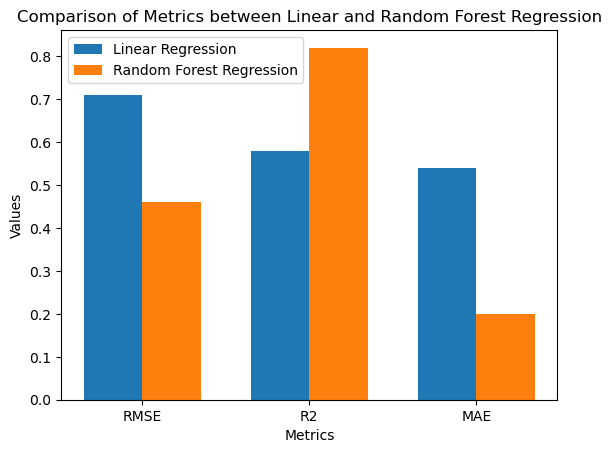

In [8]:
import matplotlib.pyplot as plt

# Results for Linear Regression
linear_regression_results = {'RMSE': 0.71, 'R2': 0.58, 'MAE': 0.54}

# Results for Random Forest Regression
random_forest_results = {'RMSE': 0.46, 'R2': 0.82, 'MAE': 0.20}

# Data for plotting
metrics = ['RMSE', 'R2', 'MAE']
linear_regression_values = [linear_regression_results['RMSE'], linear_regression_results['R2'], linear_regression_results['MAE']]
random_forest_values = [random_forest_results['RMSE'], random_forest_results['R2'], random_forest_results['MAE']]

# Bar graph
bar_width = 0.35
index = range(len(metrics))

fig, ax = plt.subplots()

bar1 = ax.bar(index, linear_regression_values, bar_width, label='Linear Regression')
bar2 = ax.bar([i + bar_width for i in index], random_forest_values, bar_width, label='Random Forest Regression')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics between Linear and Random Forest Regression')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Display the bar graph
plt.show()
